# Traffic4cast 2021 Competition

![t4c20logo](../t4c20logo.png)

**About:**
In this notebook, we explore the distribution of the test slots.

**Caveat:**
In order to make the module imports work properly set `PYTHONPATH=$PWD` before launching the notebook server from the repo root folder.

In [1]:
import glob
import re

import matplotlib.pyplot as plt
import numpy as np
from IPython.core.display import display
from IPython.core.display import HTML

from util.check_data_raw_dir import check_raw_data_dir
from util.h5_util import load_h5_file

In [2]:
%load_ext autoreload
%load_ext snakeviz
%load_ext time
%autoreload 2
%autosave 60


display(HTML("<style>.container { width:80% !important; }</style>"))

The time module is not an IPython extension.


Autosaving every 60 seconds


In [3]:
BASE_FOLDER = "../data/raw"
check_raw_data_dir(BASE_FOLDER, show_missing=False)

File structure ../data/raw:  (✓)


## The data set 2021

In [4]:
cities = [re.search(r".*/([A-Z]+)", s).group(1) for s in glob.glob(f"{BASE_FOLDER}/*")]
print(cities)
print(len(cities))

['CHICAGO', 'ISTANBUL', 'VIENNA', 'BERLIN', 'NEWYORK', 'MELBOURNE', 'MOSCOW', 'BARCELONA', 'BANGKOK', 'ANTWERP']
10


In [5]:
core_challenge_temporal_transfer_cities = [re.search(r".*/([A-Z]+)/", s).group(1) for s in glob.glob(f"{BASE_FOLDER}/**/*test_temporal.h5", recursive=True)]
print(core_challenge_temporal_transfer_cities)
print(len(core_challenge_temporal_transfer_cities))

['CHICAGO', 'ISTANBUL', 'BERLIN', 'MELBOURNE']
4


In [6]:
extended_challenge_spatiotemporal_transfer_cities = [
    re.search(r".*/([A-Z]+)/", s).group(1) for s in glob.glob(f"{BASE_FOLDER}/**/*test_spatiotemporal.h5", recursive=True)
]
print(extended_challenge_spatiotemporal_transfer_cities)
print(len(extended_challenge_spatiotemporal_transfer_cities))

['VIENNA', 'NEWYORK']
2


In [7]:
full_training_cities = [c for c in cities if c not in core_challenge_temporal_transfer_cities and c not in extended_challenge_spatiotemporal_transfer_cities]
print(full_training_cities)
print(len(full_training_cities))

['MOSCOW', 'BARCELONA', 'BANGKOK', 'ANTWERP']
4


### Week day distribution of test slots

In [8]:
test_additional_data = {}
for city in core_challenge_temporal_transfer_cities + extended_challenge_spatiotemporal_transfer_cities:
    test_additional_data[city] = load_h5_file(glob.glob(f"{BASE_FOLDER}/{city}/*test_additional*.h5")[0])

<ipython-input-9-dc6a731adbec>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])


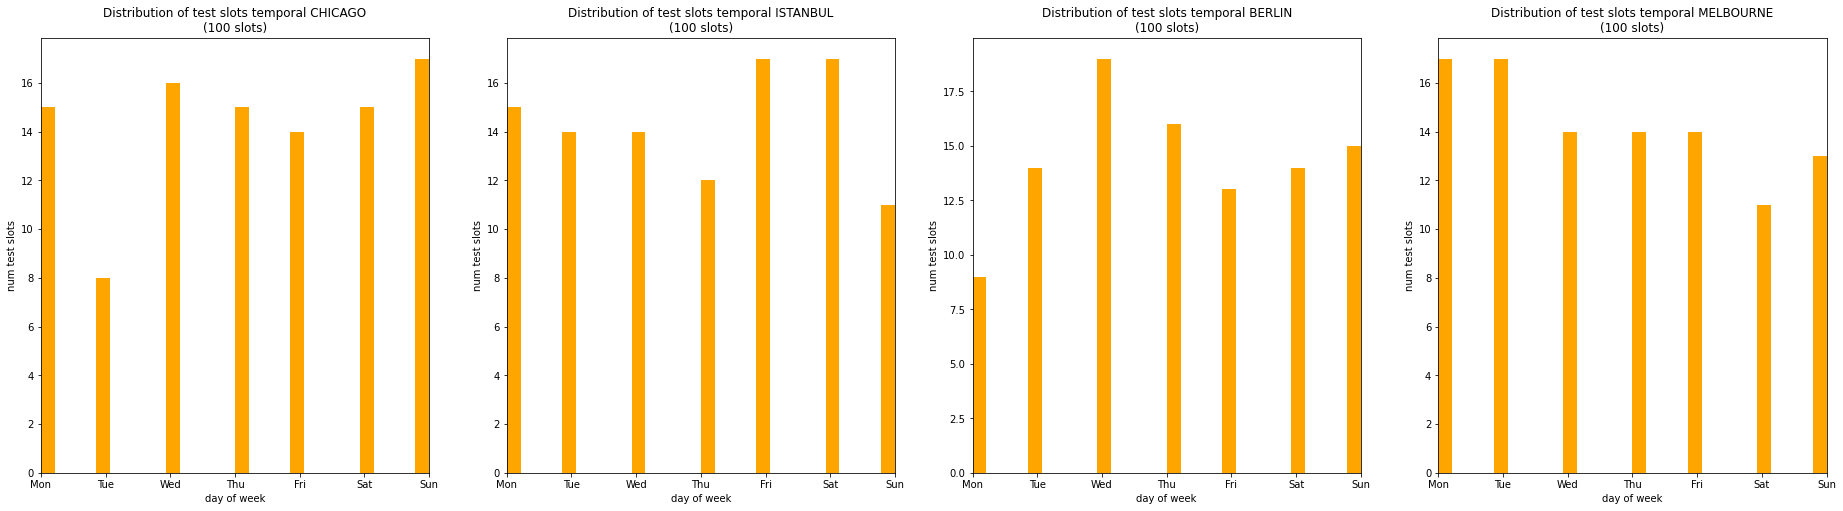

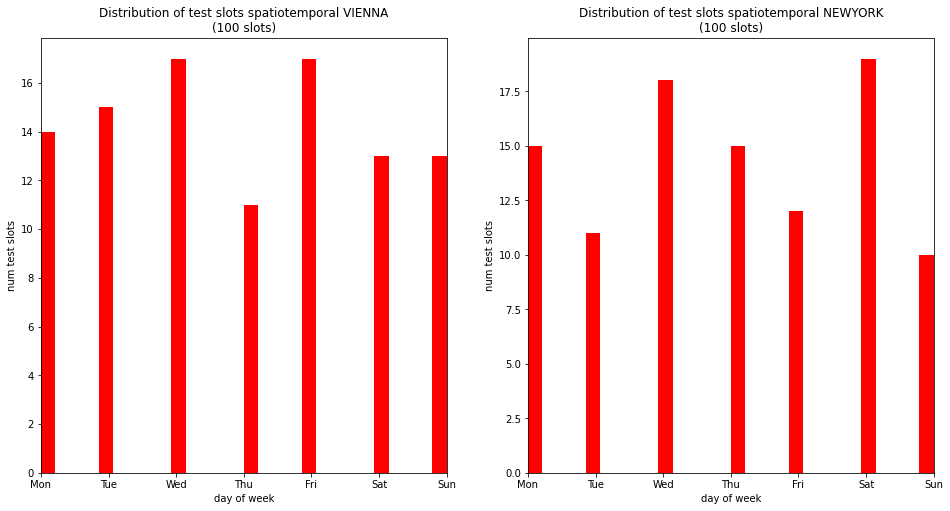

In [9]:
rows = 3
cols = 5
scale_factor = 8

for competition, color, cities_subset in [
    ("temporal", "orange", core_challenge_temporal_transfer_cities),
    ("spatiotemporal", "red", extended_challenge_spatiotemporal_transfer_cities),
]:
    rows = 1
    cols = len(cities_subset)
    fig, axs = plt.subplots(rows, cols, figsize=(cols * scale_factor, rows * scale_factor))

    for i, city in enumerate(cities_subset):
        ax = axs[i]
        ax.set_title(f"Distribution of test slots {competition} {city}")

        test_slots_city = test_additional_data[city][:, 0]

        ax.set_title(f"Distribution of test slots {competition} {city}\n({len(test_slots_city)} slots)")
        counts, bins = np.histogram(test_slots_city, 28)
        ax.hist(bins[:-1], bins, weights=counts, color=color)

        ax.set_xlim([0, 6])
        ax.set_xlabel("day of week")
        ax.set_ylabel("num test slots")
        ax.set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])

### Day time distribution of test slots

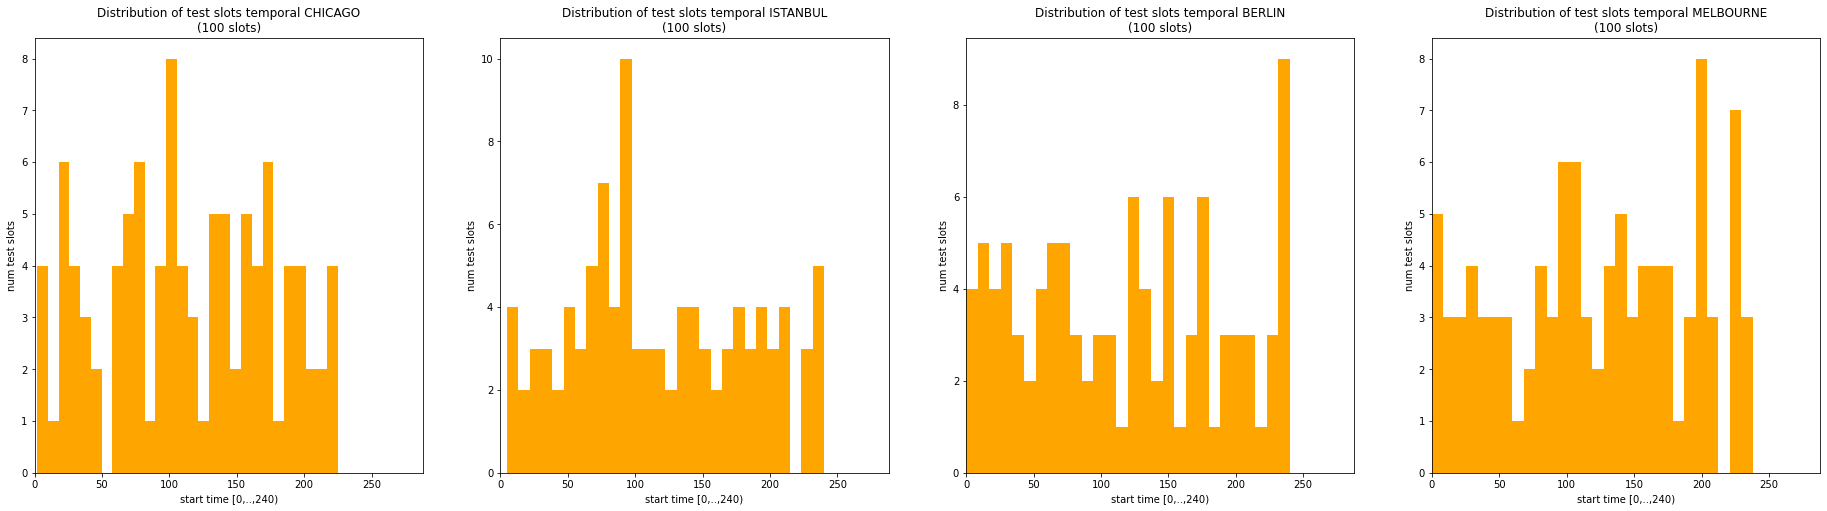

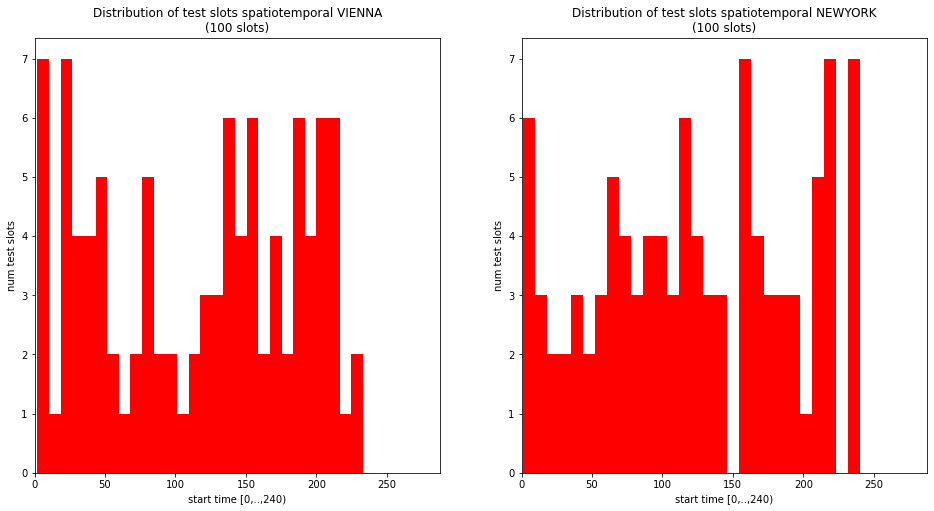

In [10]:
rows = 3
cols = 5
scale_factor = 8

for competition, color, cities_subset in [
    ("temporal", "orange", core_challenge_temporal_transfer_cities),
    ("spatiotemporal", "red", extended_challenge_spatiotemporal_transfer_cities),
]:
    rows = 1
    cols = len(cities_subset)
    fig, axs = plt.subplots(rows, cols, figsize=(cols * scale_factor, rows * scale_factor))

    for i, city in enumerate(cities_subset):
        ax = axs[i]
        ax.set_title(f"Distribution of test slots {competition} {city}")

        test_slots_city = test_additional_data[city][:, 1]

        ax.set_title(f"Distribution of test slots {competition} {city}\n({len(test_slots_city)} slots)")
        counts, bins = np.histogram(test_slots_city, 28)
        ax.hist(bins[:-1], bins, weights=counts, color=color)

        ax.set_xlim([0, 288])
        ax.set_xlabel("start time [0,..,240)")
        ax.set_ylabel("num test slots")